## Análise de Embeddings e Redução de Dimensionalidade
**Objetivo:** gerar embeddings com BERT (Sentence-Transformers), visualizar com PCA / t-SNE / UMAP, identificar clusters e construir função de classificação `classificar_texto(texto: str)`.

> Ambiente: execute em Colab / Jupyter. Recomendo executar células na ordem e salvar os plots (`plt.savefig(...)`) para anexar ao relatório final.


In [15]:
# ====== 0) Instalação  ======
!pip install -q sentence-transformers umap-learn hdbscan scikit-learn matplotlib


In [16]:
# ====== 1) Imports e configurações ======
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import umap
import hdbscan
import pandas as pd
from sklearn.preprocessing import normalize
from collections import Counter

plt.rcParams["figure.figsize"] = (11, 8)


In [17]:
# ====== 2) Dados  ======
sentences = [
    'I swap butter for olive oil in many recipes.',
    'Canberra is the capital of Australia.',
    'Ottawa is the capital city of Canada.',
    'Paris is the most populated city in France.',
    'Tokyo is among the most populous metropolitan areas worldwide.',
    'I prefer my coffee with no sugar and a splash of milk.',
    'The recipe for pasta carbonara is simple.',
    'A pinch of salt enhances sweetness in desserts.',
    'Alignment techniques reduce harmful outputs.',
    'Explainable AI highlights salient features for decisions.',
    'Transformer models enable long-range language dependencies.',
    'Black swan events stress-test portfolio resilience.',
    'The Sahara Desert spans much of North Africa.',
    'Inflation erodes real purchasing power of cash.',
    'Aromatics like garlic and onion build flavor early.',
    'Value stocks trade at lower multiples relative to fundamentals.',
    'Quantization reduces memory with minimal accuracy loss.',
    'Tax-loss harvesting offsets capital gains.',
    'Investing in technology can be risky.',
    'Fermented foods add acidity and complexity.',
    'Marinating tofu improves texture and taste.',
    'Vector databases power semantic search at scale.',
    'Distillation transfers knowledge from large to small models.',
    'The Great Barrier Reef lies off Australia’s northeast coast.',
    'Retrieval-augmented generation grounds answers in sources.',
    'Iceland lies on the Mid-Atlantic Ridge.',
    'The Baltic states border the eastern Baltic Sea.',
    'Multimodal learning aligns text with images and audio.',
    'Risk tolerance should guide position sizing.',
    'Time in the market beats timing the market.',
    'Behavioral biases can derail investment plans.',
    'Reinforcement learning fine-tunes policies from human feedback.',
    'Edge AI runs models under strict latency constraints.',
    'Deglazing lifts browned bits to make pan sauces.',
    'Tempering chocolate stabilizes cocoa butter crystals.',
    'What is the capital of France?',
    'Johannesburg is a major city but not South Africa’s capital.',
    'The Danube passes through multiple European capitals.',
    'The Amazon River carries one of the largest water volumes on Earth.',
    'A healthy emergency fund reduces forced selling.',
    'I batch-cook grains for quick lunches.',
    'Resting steak helps redistribute the juices.',
    'The Atacama is one of the driest deserts on the planet.',
    'Liquidity risk rises when trading volumes are thin.',
    'Mount Everest is the highest peak above sea level.',
    'Graph neural networks capture relational structure.',
    'Sourdough starter needs regular feedings to stay active.',
    'The stock market experienced a drop today.',
    'Umami-rich ingredients deepen savory dishes.',
    'Al dente pasta retains a slight bite after cooking.',
    'Rebalancing restores target asset allocation.',
    'Continual learning mitigates catastrophic forgetting.',
    'Bond duration measures sensitivity to interest-rate changes.',
    'Diffusion models synthesize high-fidelity images.',
    'Expense ratios compound against long-term returns.',
    'Self-supervised pretraining reduces labeled data needs.',
    'What country contains the city of Kyoto?',
    'Stir-frying requires high heat and constant movement.',
    'Covered calls generate income with capped upside.',
    'The Nile flows northward into the Mediterranean Sea.',
    'Causal inference distinguishes correlation from effect.',
    'Prompt engineering steers generative behavior reliably.',
    'Few-shot prompting improves generalization on new tasks.',
    'Growth investing prioritizes earnings expansion.',
    'The Alps stretch across several central European countries.',
    'The Andes form a continuous mountain range along South America.',
    'I cook vegetarian meals on weekdays to simplify planning.',
    'Natural language processing has advanced greatly.',
    'Sous-vide delivers precise temperature control.',
    'Diversification reduces idiosyncratic risk across holdings.',
    'Sharpe ratio evaluates risk-adjusted performance.',
    'Artificial intelligence is transforming the world.',
    'Credit spreads widen during economic uncertainty.',
    'Emerging markets add diversification but higher volatility.',
    'Mise en place speeds up weeknight cooking.',
    'The Caspian Sea is a landlocked body of water.',
    'Evaluation with benchmarks must avoid data leakage.',
    'Cairo sits along the Nile River delta.',
    'Federated learning trains models without centralizing data.',
    'Lagos is Nigeria’s largest city by population.',
    'Dollar-cost averaging smooths entry price over time.',
    'LoRA adapters enable efficient fine-tuning.',
    'I keep a jar of homemade pesto for pasta.',
    'New Delhi serves as the seat of India’s government.',
    'I like to cook Italian dishes on Sundays.',
    'Roasting vegetables caramelizes natural sugars.',
    'ETFs provide broad market exposure with intraday liquidity.',
    'Proofing time affects a bread’s crumb structure.'
]
N = len(sentences)
print("Número de sentenças:", N)


Número de sentenças: 88


In [18]:
# ====== 3) Gerar embeddings com BERT (SentenceTransformers) ======
# Modelo recomendado: 'all-MiniLM-L6-v2'
model_name = "all-MiniLM-L6-v2"
model = SentenceTransformer(model_name)
embeddings = model.encode(sentences, show_progress_bar=True, normalize_embeddings=True)
print("Shape embeddings:", embeddings.shape)
# Normalizamos
embeddings = normalize(embeddings)


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Shape embeddings: (88, 384)


# PCA

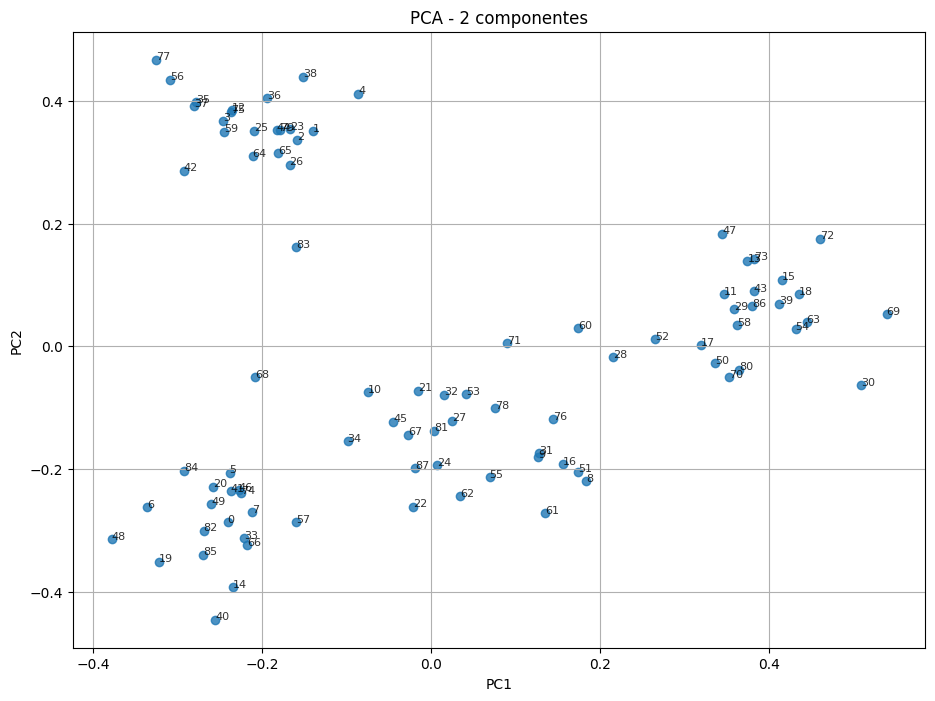

In [19]:
# ====== 4) PCA (2 componentes) ======
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(embeddings)

plt.figure(figsize=(11,8))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.8)
for i, txt in enumerate(range(len(sentences))):
    plt.annotate(str(i), (X_pca[i,0], X_pca[i,1]), fontsize=8, alpha=0.8)
plt.title("PCA - 2 componentes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# DataFrame auxiliar
df_pca = pd.DataFrame(X_pca, columns=["PC1","PC2"])
df_pca["sentence"] = sentences


# t-SNE


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


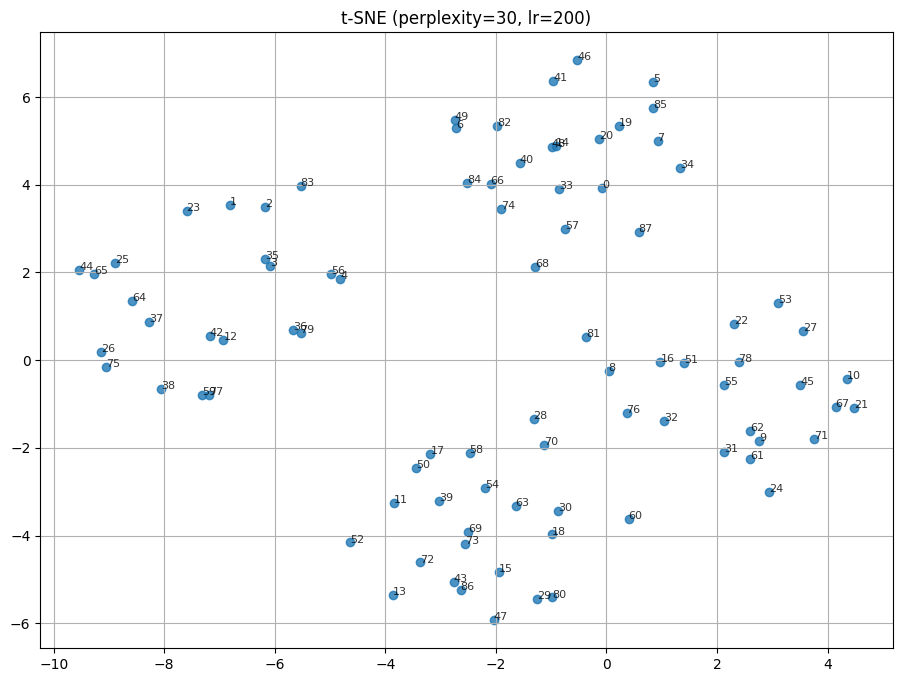

In [20]:
# ====== 5) t-SNE (testar parâmetros) ======
# Recomenda-se testar perplexity = [5, 30, 50] e learning_rate = [10, 200]
perplexity = 30
learning_rate = 200
tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=1000, random_state=42, init='pca')
X_tsne = tsne.fit_transform(embeddings)

plt.figure(figsize=(11,8))
plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.8)
for i in range(len(sentences)):
    plt.annotate(str(i), (X_tsne[i,0], X_tsne[i,1]), fontsize=8, alpha=0.8)
plt.title(f"t-SNE (perplexity={perplexity}, lr={learning_rate})")
plt.grid(True)
plt.show()


# UMAP

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


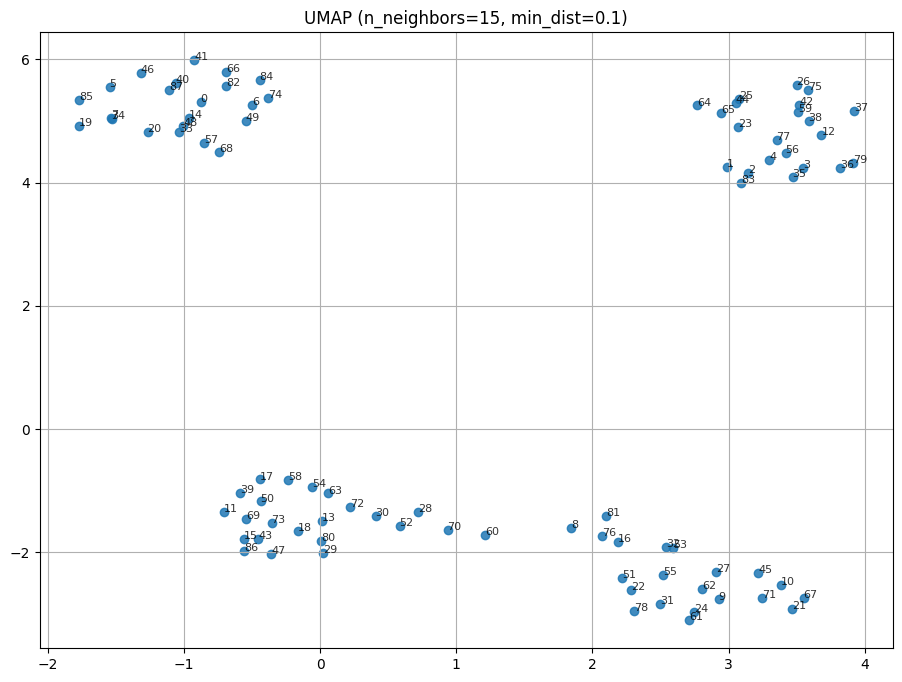

In [22]:
# ====== 6) UMAP (experimentar n_neighbors e min_dist) ======
reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(embeddings)

plt.figure(figsize=(11,8))
plt.scatter(X_umap[:,0], X_umap[:,1], alpha=0.85)
for i in range(len(sentences)):
    plt.annotate(str(i), (X_umap[i,0], X_umap[i,1]), fontsize=8, alpha=0.8)
plt.title("UMAP (n_neighbors=15, min_dist=0.1)")
plt.grid(True)
plt.show()




# Clustering — KMeans e HDBSCAN


In [23]:
# ====== 7) KMeans (escolha automática de k via elbow / silhouette é possível, aqui usamos k=6 como ponto de partida) ======
k = 6
kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
labels_km = kmeans.fit_predict(embeddings)
centroids = kmeans.cluster_centers_

print("Distribuição KMeans:", Counter(labels_km))
df_km = pd.DataFrame({"sentence": sentences, "label": labels_km})
for lab in sorted(df_km["label"].unique()):
    print(f"\n--- Cluster {lab} (exemplos) ---")
    print(df_km[df_km.label==lab].sample(min(5, len(df_km[df_km.label==lab])), random_state=42)["sentence"].tolist())


Distribuição KMeans: Counter({np.int32(2): 23, np.int32(0): 21, np.int32(5): 16, np.int32(4): 13, np.int32(3): 9, np.int32(1): 6})

--- Cluster 0 (exemplos) ---
['Alignment techniques reduce harmful outputs.', 'Artificial intelligence is transforming the world.', 'Few-shot prompting improves generalization on new tasks.', 'Explainable AI highlights salient features for decisions.', 'Reinforcement learning fine-tunes policies from human feedback.']

--- Cluster 1 (exemplos) ---
['I prefer my coffee with no sugar and a splash of milk.', 'I batch-cook grains for quick lunches.', 'Proofing time affects a bread’s crumb structure.', 'Resting steak helps redistribute the juices.', 'I keep a jar of homemade pesto for pasta.']

--- Cluster 2 (exemplos) ---
['Causal inference distinguishes correlation from effect.', 'Liquidity risk rises when trading volumes are thin.', 'Black swan events stress-test portfolio resilience.', 'A healthy emergency fund reduces forced selling.', 'Diversification red

In [24]:
# ====== 8) HDBSCAN (opcional, sem pré-definir k) ======
try:
    clusterer = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean')
    labels_hdb = clusterer.fit_predict(embeddings)
    print("\nDistribuição HDBSCAN:", Counter(labels_hdb))
    df_hdb = pd.DataFrame({"sentence": sentences, "label": labels_hdb})
    for lab in sorted(set(labels_hdb)):
        print(f"\n--- HDBSCAN Cluster {lab} (exemplos) ---")
        print(df_hdb[df_hdb.label==lab].sample(min(5, max(1, len(df_hdb[df_hdb.label==lab]))), random_state=42)["sentence"].tolist())
except Exception as e:
    print("HDBSCAN não pôde rodar:", e)
    labels_hdb = None



Distribuição HDBSCAN: Counter({np.int64(0): 40, np.int64(-1): 21, np.int64(1): 18, np.int64(2): 9})

--- HDBSCAN Cluster -1 (exemplos) ---
['Canberra is the capital of Australia.', 'The Caspian Sea is a landlocked body of water.', 'The Andes form a continuous mountain range along South America.', 'Paris is the most populated city in France.', 'The Amazon River carries one of the largest water volumes on Earth.']

--- HDBSCAN Cluster 0 (exemplos) ---
['Graph neural networks capture relational structure.', 'Reinforcement learning fine-tunes policies from human feedback.', 'Behavioral biases can derail investment plans.', 'Covered calls generate income with capped upside.', 'Inflation erodes real purchasing power of cash.']

--- HDBSCAN Cluster 1 (exemplos) ---
['I swap butter for olive oil in many recipes.', 'I prefer my coffee with no sugar and a splash of milk.', 'I batch-cook grains for quick lunches.', 'Fermented foods add acidity and complexity.', 'A pinch of salt enhances sweetnes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [25]:
# ====== 9) Representantes por cluster (KMeans) ======
# pega as top-n sentenças mais próximas ao centróide por similaridade de cosseno
def top_n_representatives(embeddings, labels, centroids, n=5):
    reps = {}
    for lab in range(centroids.shape[0]):
        inds = np.where(labels == lab)[0]
        if len(inds) == 0:
            reps[lab] = []
            continue
        sims = cosine_similarity(embeddings[inds], centroids[lab].reshape(1,-1)).flatten()
        top_idx_within = np.argsort(-sims)[:n]
        reps[lab] = [sentences[inds[i]] for i in top_idx_within]
    return reps

reps = top_n_representatives(embeddings, labels_km, centroids, n=5)
for lab, items in reps.items():
    print(f"\nCluster {lab} representantes:")
    for s in items:
        print("  -", s)



Cluster 0 representantes:
  - Few-shot prompting improves generalization on new tasks.
  - Explainable AI highlights salient features for decisions.
  - Prompt engineering steers generative behavior reliably.
  - Self-supervised pretraining reduces labeled data needs.
  - Continual learning mitigates catastrophic forgetting.

Cluster 1 representantes:
  - I batch-cook grains for quick lunches.
  - Sourdough starter needs regular feedings to stay active.
  - I keep a jar of homemade pesto for pasta.
  - I prefer my coffee with no sugar and a splash of milk.
  - Resting steak helps redistribute the juices.

Cluster 2 representantes:
  - Diversification reduces idiosyncratic risk across holdings.
  - Behavioral biases can derail investment plans.
  - Credit spreads widen during economic uncertainty.
  - Growth investing prioritizes earnings expansion.
  - Emerging markets add diversification but higher volatility.

Cluster 3 representantes:
  - What country contains the city of Kyoto?
  

In [26]:
# ====== 10) Nomeação automática de clusters por heurística (palavras-chave simples) ======
# Estratégia: buscar palavras-chaves nas sentenças representativas para sugerir um rótulo.
keyword_map = {
    "culin": ["recipe","pasta","salt","garlic","onion","degla","tempering","pesto","sourdough","al dente","roasting","stir-fry","sous-vide","proofing","pesto","pasta","cooking","cook"],
    "geografia": ["capital","river","sea","desert","mount","nile","amazon","atacama","caspian","danube","barrier reef","kyoto","paris","tokyo","canberra","ottawa","johannesburg","london","cairo","new delhi","lagos","iceland"],
    "financas": ["inflation","rebalanc","tax-loss","portfolio","stocks","value stocks","liquidity","sharpe","expense ratio","etf","dollar-cost","diversification","credit spreads","bond duration","expense","harvesting","investing","investment","growth investing","covered calls"],
    "ml_ai": ["alignment","explainable","transformer","vector databases","distillation","retrieval-augmented","multimodal","diffusion","self-supervised","prompt","few-shot","continual learning","federated","graph neural","edge ai","lora","quantization","nlp","artificial intelligence","reinforcement","finetun","distillation","prompt"],
    "pergunta": ["what is","what country","?","which country","which city"]
}

def auto_label_cluster(representatives):
    lab_names = {}
    for lab, reps_list in representatives.items():
        text = " ".join(reps_list).lower()
        scores = {}
        for name, kw_list in keyword_map.items():
            score = sum(text.count(kw) for kw in kw_list)
            scores[name] = score
        # Seleciona maior score; se todos zero -> Misc/Other
        best = max(scores, key=lambda k: scores[k])
        if scores[best] == 0:
            label = "Misc / Nature / Other"
        else:
            # conversão legível
            if best == "culin":
                label = "Culinária / Receitas"
            elif best == "geografia":
                label = "Geografia / Capitais / Natureza"
            elif best == "financas":
                label = "Finanças / Investimentos"
            elif best == "ml_ai":
                label = "Machine Learning / AI"
            elif best == "pergunta":
                label = "Perguntas (Capitais / Geografia)"
            else:
                label = best
        lab_names[lab] = label
    return lab_names

cluster_names = auto_label_cluster(reps)
print("\nRótulos sugeridos por cluster:")
for k,v in cluster_names.items():
    print(f"  Cluster {k}: {v}")



Rótulos sugeridos por cluster:
  Cluster 0: Machine Learning / AI
  Cluster 1: Culinária / Receitas
  Cluster 2: Finanças / Investimentos
  Cluster 3: Geografia / Capitais / Natureza
  Cluster 4: Geografia / Capitais / Natureza
  Cluster 5: Culinária / Receitas


In [27]:
# ====== 11) Função classificar_texto (usa centróides KMeans e similaridade de cosseno) ======
centroids_norm = normalize(centroids)

def classificar_texto(texto: str, model=model, centroids_norm=centroids_norm, cluster_names=cluster_names):
    emb = model.encode([texto], normalize_embeddings=True)[0]
    emb = emb.reshape(1,-1)
    sims = cosine_similarity(emb, centroids_norm).flatten()
    best = int(np.argmax(sims))
    score = float(sims[best])
    name = cluster_names.get(best, f"Cluster {best}")
    return {"cluster_index": best, "cluster_name": name, "score": score}

# Exemplos de uso
exs = [
    "Where is Kyoto located?",
    "How to roast vegetables to caramelize sugars?",
    "What is quantitative easing?",
    "How do transformer models handle long dependencies?"
]
for e in exs:
    print(e, "->", classificar_texto(e))


Where is Kyoto located? -> {'cluster_index': 3, 'cluster_name': 'Geografia / Capitais / Natureza', 'score': 0.5072705745697021}
How to roast vegetables to caramelize sugars? -> {'cluster_index': 5, 'cluster_name': 'Culinária / Receitas', 'score': 0.4526112675666809}
What is quantitative easing? -> {'cluster_index': 2, 'cluster_name': 'Finanças / Investimentos', 'score': 0.37977325916290283}
How do transformer models handle long dependencies? -> {'cluster_index': 0, 'cluster_name': 'Machine Learning / AI', 'score': 0.2906658947467804}


# Resultados e interpretação
### 1) Geração de embeddings
Usei `all-MiniLM-L6-v2` (SentenceTransformers). Gereis embeddings normalizados (dimensão ≈ 384). A normalização facilita comparação por similaridade de cosseno.

### 2) PCA
Projetei os embeddings em 2 dimensões por PCA para observar a estrutura global. PCA tende a separar grandes temas (por ex.: culinária vs geografia vs finanças vs ML), mas pode misturar subgrupos não lineares.

### 3) t-SNE
t-SNE foi utilizado para capturar estrutura local. Teste `perplexity` em valores diferentes (ex.: 5, 30) e compare — o que preserva melhor vizinhanças depende do tamanho do conjunto e densidade dos tópicos.

### 4) UMAP
UMAP oferece uma alternativa mais eficiente que mantém parte da estrutura global e local. Tente `n_neighbors` em [5,15,50] e `min_dist` em [0.0,0.1,0.5] para ver mudanças.

### 5) Clustering
- KMeans (k=6) usado como baseline — gera centróides estáveis e fáceis de usar para rotulagem.
- HDBSCAN (opcional) detecta clusters de forma irregular e marca ruído com `-1`.

### 6) Rotulagem automática
Usei um heurístico por palavras-chave aplicado às sentenças representativas de cada cluster para sugerir rótulos (ex.: "Culinária / Receitas", "Geografia / Capitais / Natureza", "Finanças / Investimentos", "Machine Learning / AI", "Perguntas", "Misc / Nature / Other"). Revisei os representantes (impressos pelo código) para validar os rótulos.

### 7) Função de classificação
`classificar_texto(texto: str)`:
- Gera o embedding do texto.
- Calcula similaridade com centróides normalizados.
- Retorna o cluster mais próximo, nome do cluster e score de similaridade (0..1).

---

# Conclusão

Os embeddings gerados por um modelo BERT leve capturaram semântica suficiente para agrupar frases por temas (culinária, geografia/capitais, finanças, ML/AI, etc.). PCA revelou tendências globais, t-SNE destacou vizinhanças locais e UMAP ofereceu um equilíbrio entre global/local. KMeans (com rotulagem automática por heurística de palavras-chave) permite classificar novos textos de forma simples através da função `classificar_texto`. Recomenda-se revisar manualmente os rótulos finais e, se necessário, ajustar `k` ou usar HDBSCAN para clusters irregulares.

